In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
%matplotlib inline

## Angle

In [15]:
n1 = sio.loadmat('SpikeActBZ1.mat')
n2 = sio.loadmat('SpikeActBZ2.mat')
n3 = sio.loadmat('SpikeActBZ3.mat')
n4 = sio.loadmat('SpikeActBZ4.mat')
n5 = sio.loadmat('SpikeActBZ5.mat')
n6 = sio.loadmat('SpikeActBZ6.mat')
n7 = sio.loadmat('SpikeActBZ7.mat')
n8 = sio.loadmat('SpikeActBZ8.mat')
n9 = sio.loadmat('SpikeActBZ9.mat')
n10 = sio.loadmat('SpikeActBZ10.mat')
n11 = sio.loadmat('SpikeActBZ11.mat')
n12 = sio.loadmat('SpikeActBZ12.mat')
n13 = sio.loadmat('SpikeActBZ13.mat')
n14 = sio.loadmat('SpikeActBZ14.mat')
n15 = sio.loadmat('SpikeActBZ15.mat')
n16 = sio.loadmat('SpikeActBZ16.mat')
cond = sio.loadmat('cond.mat')



In [16]:
cond = cond['Cond'].ravel()
cond_copy = deepcopy(cond)
for i in range(8):
    cond_copy[np.where((cond_copy==i+1) | (cond_copy==i+1+8))[0]] = i
unique_labels = np.unique(cond_copy)
print("labels:", unique_labels)

labels: [0 1 2 3 4 5 6 7]


In [17]:
n = [n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15,n16]
su_dic = {}
list_su = [1, 2, 3, 5, 8, 9, 11, 13]
for i in list_su:
    mat = n[i-1]
    su_dic[str(i)] = mat['su'][0][0][:, 2500:5500].astype(float)

In [18]:
neuron_list = ['1', '2', '3', '5', '8', '9', '11', '13']
su_move = {}
stride = 15
win_size = 40
for idx in neuron_list:
    i = 0
    mean_list = []
    while True:
        if (i*stride)+win_size > 3000:
            break
        mean_list.append(np.mean(su_dic[idx][:, i*stride:(i*stride)+win_size], axis=1))
        i += 1
    su_move[idx] = np.array(mean_list).T
            


In [19]:
recall_matrix = []
for i in range(su_move['1'].shape[1]):
    dataset = []
    for idx in neuron_list:
        dataset.append(su_move[idx][:, i])
    dataset = np.array(dataset).T
    recall_class_list = []
    for rs in range(0, 800, 20):
        X_train, X_test, y_train, y_test = train_test_split(dataset, cond_copy, test_size=0.2, random_state=rs)
        t = StandardScaler()
        X_train = t.fit_transform(X_train)
        X_test = t.transform(X_test)
        model = SVC(kernel='linear', probability=True)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        recall_class_list.append(recall_score(y_test, y_pred, average=None).tolist())
    recall_matrix.append(np.mean(np.array(recall_class_list), axis=0))
recall_matrix = np.array(recall_matrix).T

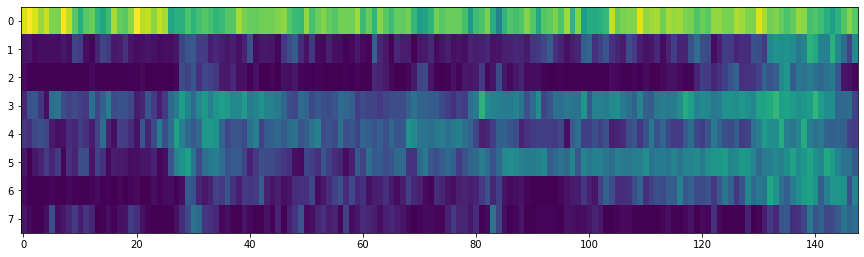

In [28]:
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(recall_matrix, aspect=5)
plt.yticks(np.arange(8))
plt.show()

## Radius

In [29]:
cond_radius = deepcopy(cond)

cond_radius[np.where(cond<=8)[0]] = 0
cond_radius[np.where(cond>8)[0]] = 1
unique_labels = np.unique(cond_radius)
print("labels:", unique_labels)

labels: [0 1]


In [30]:
recall_matrix_r = []
for i in range(su_move['1'].shape[1]):
    dataset = []
    for idx in neuron_list:
        dataset.append(su_move[idx][:, i])
    dataset = np.array(dataset).T
    recall_class_list = []
    for rs in range(0, 800, 20):
        X_train, X_test, y_train, y_test = train_test_split(dataset, cond_radius, test_size=0.2, random_state=rs)
        t = StandardScaler()
        X_train = t.fit_transform(X_train)
        X_test = t.transform(X_test)
        model = SVC(kernel='linear', probability=True)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        recall_class_list.append(recall_score(y_test, y_pred, average=None).tolist())
    recall_matrix_r.append(np.mean(np.array(recall_class_list), axis=0))
recall_matrix_r = np.array(recall_matrix_r).T

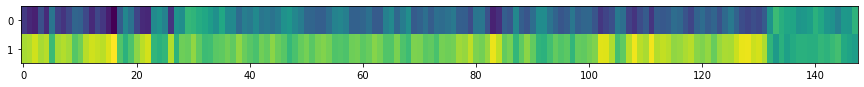

In [31]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.imshow(recall_matrix_r, aspect=5)
plt.yticks([0, 1])
plt.show()